**Abstract** <br>
JOIN_DATE와 관련한 분석 

- 모델에 대한 기본 변수 : D_TYPE, GOODS_TYPE, AD1
- 추가적으로 'JOIN_DATE' 변수를 통한 분석을 시행한다.
    - 가입한 일수별, 가입한 주수별, 가입 달별 

분석 방법
1. train data 5-fold cross varidation
2. 기본 변수만을 가진 모델 생성
3. 'JOIN_DATE'변수에 대한 추가적인 변수 생성
4. 추가 생성 변수를 추가하여 모델 성능확인
5. 최종 모형 변수 결정

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [64]:
# 라이브러리 import 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
#한글 폰트 깨짐 방지
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

In [66]:
# seed 설정
np.random.seed(42)

In [67]:
# 데이터 불러오기
df = pd.read_csv('./모두컴퍼니_기술과제/실전db.csv')

# JOIN_DATE, DATE 를 날짜형 변수로 바꾸기
df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])

## 파생변수 생성
df['ELAPSED_DAY'] = (df['DATE']-df['JOIN_DATE']).dt.days
df['ELAPSED_WEEK'] = (df['ELAPSED_DAY'] -1)//7 + 1

df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [68]:
# Feature Encoding 함수 만들기 
def feature_enc(dataframe):
    le = preprocessing.LabelEncoder()

    dataframe['D_TYPE'] = le.fit_transform(dataframe['D_TYPE'])
    dataframe['GOODS_TYPE'] = le.fit_transform(dataframe['GOODS_TYPE'])
    dataframe['AD1'] = le.fit_transform(dataframe['AD1'])

In [69]:
feature_enc(df)

# 기본모형 

In [70]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY','ELAPSED_WEEK','MONTH','DAY'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY','ELAPSED_WEEK','MONTH','DAY'],axis=1)

# lightGBM 모형
lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

# 랜덤포레스트 모형
#rfr = RandomForestRegressor()
#rfr.fit(x_train, y_train)
#y_train = rfr.predict(train_x) 
#y_pred = rfr.predict(x_test)

t_MSE1 = mean_squared_error(train_y, y_train)
t_MAE1 = mean_absolute_error(train_y, y_train)
MSE1 = mean_squared_error(test_y, y_pred)
MAE1 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE1)
print('train MAE :', t_MAE1)
print('MSE :', MSE1)
print('MAE :', MAE1)

train MSE : 0.1325405999475192
train MAE : 0.04773630148640207
MSE : 0.3765204558618609
MAE : 0.05391399509577541


## 기본모형 + 가입일 수 

In [71]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_WEEK','MONTH','DAY'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_WEEK','MONTH','DAY'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE2 = mean_squared_error(train_y, y_train)
t_MAE2 = mean_absolute_error(train_y, y_train)
MSE2 = mean_squared_error(test_y, y_pred)
MAE2 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE2)
print('train MAE :', t_MAE2)
print('MSE :', MSE2)
print('MAE :', MAE2)

train MSE : 0.046291666024079685
train MAE : 0.04024984410414615
MSE : 0.18025238402113586
MAE : 0.0478392684848961


## 기본모형 + 가입일수 + 월 + 일 

In [72]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_WEEK'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_WEEK'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE3 = mean_squared_error(train_y, y_train)
t_MAE3 = mean_absolute_error(train_y, y_train)
MSE3 = mean_squared_error(test_y, y_pred)
MAE3 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE3)
print('train MAE :', t_MAE3)
print('MSE :', MSE3)
print('MAE :', MAE3)

train MSE : 0.03804723674368178
train MAE : 0.039430308136017646
MSE : 0.1714325019413874
MAE : 0.050907248725893535


## 기본모형 + 가입주수 

In [73]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY','MONTH','DAY'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY','MONTH','DAY'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE4 = mean_squared_error(train_y, y_train)
t_MAE4 = mean_absolute_error(train_y, y_train)
MSE4 = mean_squared_error(test_y, y_pred)
MAE4 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE4)
print('train MAE :', t_MAE4)
print('MSE :', MSE4)
print('MAE :', MAE4)

train MSE : 0.046899073975519505
train MAE : 0.04031551231067027
MSE : 0.1761208621176009
MAE : 0.04779176945921988


## 기본모형 + 가입주수 + 월 + 일

In [74]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE5 = mean_squared_error(train_y, y_train)
t_MAE5 = mean_absolute_error(train_y, y_train)
MSE5 = mean_squared_error(test_y, y_pred)
MAE5 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE5)
print('train MAE :', t_MAE5)
print('MSE :', MSE5)
print('MAE :', MAE5)

train MSE : 0.03776090454788581
train MAE : 0.03943828347622916
MSE : 0.17225495609112312
MAE : 0.0508955928206124


# JOIN_DATE 이상치(1970-01-01) 처리

In [75]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

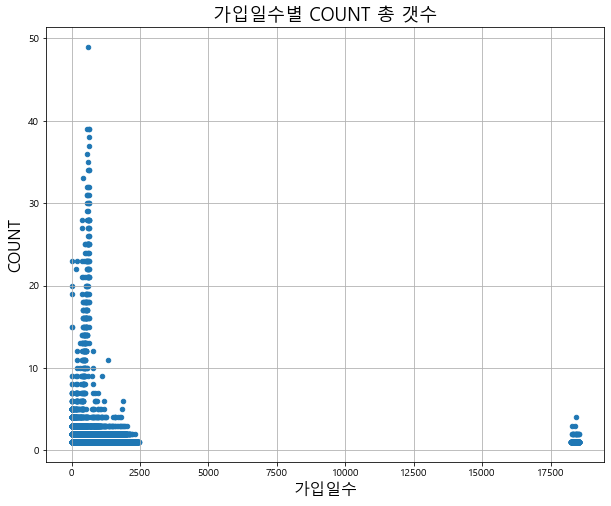

In [76]:
df_train.plot(kind='scatter', x='ELAPSED_DAY', y='COUNT', figsize=(10,8))
plt.grid()
plt.title('가입일수별 COUNT 총 갯수', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('가입일수', fontsize=16)
plt.show()

In [77]:
df_train['JOIN_DATE'].value_counts().sort_index().head()

1970-01-01    972
2013-12-16      1
2013-12-17     20
2013-12-18      1
2013-12-21      2
Name: JOIN_DATE, dtype: int64

회사 설립일 : 2013-02-04 <br>
JOIN_DATE = 1970-01-01 을 최솟값(2013-12-16)으로 변환

In [78]:
# 데이터 불러오기
df = pd.read_csv('./모두컴퍼니_기술과제/실전db.csv')
df.loc[(df['JOIN_DATE']=='1970-01-01'),'JOIN_DATE']='2013-12-16'

# JOIN_DATE, DATE 를 날짜형 변수로 바꾸기
df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])

## 파생변수 생성
df['ELAPSED_DAY'] = (df['DATE']-df['JOIN_DATE']).dt.days
df['ELAPSED_WEEK'] = (df['ELAPSED_DAY'] -1)//7 + 1

df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

feature_enc(df)

In [79]:
df['JOIN_DATE'].value_counts().sort_index().head()

2013-12-16    1095
2013-12-17      26
2013-12-18       1
2013-12-21       2
2013-12-22       2
Name: JOIN_DATE, dtype: int64

## 기본모형 + 가입일수 + 이상치 변환

In [80]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_WEEK','MONTH','DAY'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_WEEK','MONTH','DAY'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE6 = mean_squared_error(train_y, y_train)
t_MAE6 = mean_absolute_error(train_y, y_train)
MSE6 = mean_squared_error(test_y, y_pred)
MAE6 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE6)
print('train MAE :', t_MAE6)
print('MSE :', MSE6)
print('MAE :', MAE6)

train MSE : 0.046291666024079685
train MAE : 0.04024984410414615
MSE : 0.18025238402113586
MAE : 0.0478392684848961


## 기본모형 + 가입일수 + 이상치 변환 + 월 + 일

In [81]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_WEEK'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_WEEK'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE7 = mean_squared_error(train_y, y_train)
t_MAE7 = mean_absolute_error(train_y, y_train)
MSE7 = mean_squared_error(test_y, y_pred)
MAE7 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE7)
print('train MAE :', t_MAE7)
print('MSE :', MSE7)
print('MAE :', MAE7)

train MSE : 0.03804723674368178
train MAE : 0.039430308136017646
MSE : 0.1714325019413874
MAE : 0.050907248725893535


## 기본모형 + 가입주수 + 이상치 변환

In [82]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY','MONTH','DAY'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY','MONTH','DAY'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE8 = mean_squared_error(train_y, y_train)
t_MAE8 = mean_absolute_error(train_y, y_train)
MSE8 = mean_squared_error(test_y, y_pred)
MAE8 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE8)
print('train MAE :', t_MAE8)
print('MSE :', MSE8)
print('MAE :', MAE8)

train MSE : 0.04669661026028549
train MAE : 0.040316260457738055
MSE : 0.1767936944418073
MAE : 0.04783625053666587


## 기본모형 + 가입주수 + 이상치 변환 + 월 + 일

In [83]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','ELAPSED_DAY'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE9 = mean_squared_error(train_y, y_train)
t_MAE9 = mean_absolute_error(train_y, y_train)
MSE9 = mean_squared_error(test_y, y_pred)
MAE9 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE9)
print('train MAE :', t_MAE9)
print('MSE :', MSE9)
print('MAE :', MAE9)

train MSE : 0.037791119345665015
train MAE : 0.03947785094459933
MSE : 0.17276353771765823
MAE : 0.05095658276915151


# JOIN_YEAR 변수 추가

In [84]:
# 데이터 불러오기
df = pd.read_csv('./모두컴퍼니_기술과제/실전db.csv')

# JOIN_DATE, DATE 를 날짜형 변수로 바꾸기
df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])

## 파생변수 생성
df['JOIN_YEAR'] = df['JOIN_DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [85]:
feature_enc(df)

##  기본모형 + JOIN_YEAR

In [86]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','MONTH','DAY'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','MONTH','DAY'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE10 = mean_squared_error(train_y, y_train)
t_MAE10 = mean_absolute_error(train_y, y_train)
MSE10 = mean_squared_error(test_y, y_pred)
MAE10 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE10)
print('train MAE :', t_MAE10)
print('MSE :', MSE10)
print('MAE :', MAE10)

train MSE : 0.05501041070113874
train MAE : 0.04101332583670479
MSE : 0.17523067028628647
MAE : 0.04815365197703127


##  기본모형 + JOIN_YEAR + MONTH + DAY

In [87]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE11 = mean_squared_error(train_y, y_train)
t_MAE11 = mean_absolute_error(train_y, y_train)
MSE11 = mean_squared_error(test_y, y_pred)
MAE11 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE11)
print('train MAE :', t_MAE11)
print('MSE :', MSE11)
print('MAE :', MAE11)

train MSE : 0.03781623661871759
train MAE : 0.03964213976619198
MSE : 0.10652514002723203
MAE : 0.04910608971209841


## 기본모형 + JOIN_YEAR + MONTH + DAY + 이상치 변환

In [88]:
# 데이터 불러오기
df = pd.read_csv('./모두컴퍼니_기술과제/실전db.csv')
df.loc[(df['JOIN_DATE']=='1970-01-01'),'JOIN_DATE']='2013-12-16'

# JOIN_DATE, DATE 를 날짜형 변수로 바꾸기
df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])

## 파생변수 생성
df['JOIN_YEAR'] = df['JOIN_DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

feature_enc(df)

In [89]:
# train/test 분리
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

train_x = df_train.drop('COUNT',axis=1)
train_y = df_train[['COUNT']]
test_x = df_test.drop('COUNT',axis=1)
test_y = df_test[['COUNT']]

# 필요없는 컬럼제거
train_x = train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE'],axis=1)
test_x = test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE'],axis=1)

lgbr = LGBMRegressor(n_estimators=400, random_state=42) 
lgbr.fit(train_x, train_y)
y_train = lgbr.predict(train_x) 
y_pred = lgbr.predict(test_x)

t_MSE12 = mean_squared_error(train_y, y_train)
t_MAE12 = mean_absolute_error(train_y, y_train)
MSE12 = mean_squared_error(test_y, y_pred)
MAE12 = mean_absolute_error(test_y, y_pred)

print('train MSE :', t_MSE12)
print('train MAE :', t_MAE12)
print('MSE :', MSE12)
print('MAE :', MAE12)

train MSE : 0.03794687594142239
train MAE : 0.039632400779719364
MSE : 0.10718895615983717
MAE : 0.04895851976616103


# 최종 결과

In [90]:
result = pd.DataFrame({'Set':['Basic Set','+ELAPSED_DAY','+ELAPSED_DAY+MONTH+DAY','+ELAPSED_WEEK','+ELAPSED_WEEK+MONTH+DAY','+ELAPSED_DAY+outlier','+ELAPSED_DAY+outlier+MONTH+DAY','+ELAPSED_WEEK+outlier','+ELAPSED_WEEK+outlier+MONTH+DAY','+JOIN_YEAR','+JOIN_YEAR+MONTH+DAY','+JOIN_YEAR+MONTH+DAY+outlier'],
                       'labeling':['label','dum','dum','dum','dum','dum','dum','dum','dum','dum','dum','dum'],
                       'model':['LGBM','LGBM','LGBM','LGBM','LGBM','LGBM','LGBM','LGBM','LGBM','LGBM','LGBM','LGBM'],
                       'avg val MSE':[t_MSE1,t_MSE2,t_MSE3,t_MSE4,t_MSE5,t_MSE6,t_MSE7,t_MSE8,t_MSE9,t_MSE10,t_MSE11,t_MSE12],
                       'avg val MAE':[t_MAE1,t_MAE2,t_MAE3,t_MAE4,t_MAE5,t_MAE6,t_MAE7,t_MAE8,t_MAE9,t_MAE10,t_MAE11,t_MAE12],
                       'test MSE':[MSE1,MSE2,MSE3,MSE4,MSE5,MSE6,MSE7,MSE8,MSE9,MSE10,MSE11,MSE12],
                       'test MAE':[MAE1,MAE2,MAE3,MAE4,MAE5,MAE6,MAE7,MAE8,MAE9,MAE10,MAE11,MAE12]})
result

,Set,labeling,model,avg val MSE,avg val MAE,test MSE,test MAE
0,Basic Set,label,LGBM,0.132541,0.047736,0.376520,0.053914
1,+ELAPSED_DAY,dum,LGBM,0.046292,0.040250,0.180252,0.047839
2,+ELAPSED_DAY+MONTH+DAY,dum,LGBM,0.038047,0.039430,0.171433,0.050907
3,+ELAPSED_WEEK,dum,LGBM,0.046899,0.040316,0.176121,0.047792
4,+ELAPSED_WEEK+MONTH+DAY,dum,LGBM,0.037761,0.039438,0.172255,0.050896
5,+ELAPSED_DAY+outlier,dum,LGBM,0.046292,0.040250,0.180252,0.047839
6,+ELAPSED_DAY+outlier+MONTH+DAY,dum,LGBM,0.038047,0.039430,0.171433,0.050907
7,+ELAPSED_WEEK+outlier,dum,LGBM,0.046697,0.040316,0.176794,0.047836
8,+ELAPSED_WEEK+outlier+MONTH+DAY,dum,LGBM,0.037791,0.039478,0.172764,0.050957
9,+JOIN_YEAR,dum,LGBM,0.055010,0.041013,0.175231,0.048154


In [ ]:
1. 